### Mooring Timeseries Resampler

In [66]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import datetime
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [67]:
data = pd.read_csv('/Users/bell/Desktop/allsc.csv',parse_dates=True,index_col='time')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78376 entries, 2010-08-29 18:00:00 to 2019-08-14 02:00:00
Data columns (total 3 columns):
          78376 non-null object
 S_41     78291 non-null float64
 index    78376 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [69]:
data_daily = data.resample('D').mean()
data_daily[' S_41'][data_daily[' S_41'] < 30.4] = np.nan

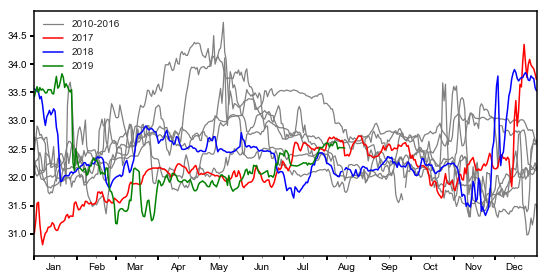

In [70]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(2010,2020,1):
    if (yy < 2016):
        plt.plot(data_daily[str(yy)].index.dayofyear,data_daily[str(yy)][' S_41'],c='gray',linewidth=1.25,label='')
    elif yy == 2016:
        plt.plot(data_daily[str(yy)].index.dayofyear,data_daily[str(yy)][' S_41'],c='gray',linewidth=1.25,label='2010-2016')
    elif yy == 2017:
        plt.plot(data_daily[str(yy)].index.dayofyear,data_daily[str(yy)][' S_41'],c='red',linewidth=1.5,label='2017')
    elif yy == 2018:
        plt.plot(data_daily[str(yy)].index.dayofyear,data_daily[str(yy)][' S_41'],c='blue',linewidth=1.5,label='2018')
    elif yy == 2019:
        plt.plot(data_daily[str(yy)].index.dayofyear,data_daily[str(yy)][' S_41'],c='green',linewidth=1.5,label='2019')

plt.legend(loc='best')
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336),)
ax1.set_xlim([1,+365])
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)

fig.savefig('images/C2_AnnualSal.png',dpi=300)
fig.savefig('images/C2_AnnualSal.svg',dpi=300)

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


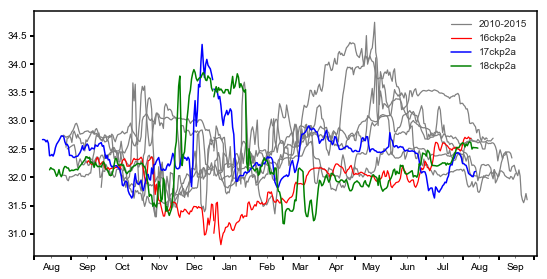

In [136]:
path = '/Users/bell/Desktop/'
files = ['10ckp2a_sc_0039m.csv',
'11ckp2a_sc_0038m.csv',
'12ckp2a_sc_0040m.csv',
'13ckp2a_sc_0039m.csv',
'14ckp2a_sc_0039m.csv',
'15ckp2a_sc_0038m.csv',
'16ckp2a_sc_0040m.csv',
'17ckp2a_sc_0039m.csv',
'18ckp2a_sc_0039m.csv']

fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for t,yy in enumerate(files):
    if (t>=0):
        data = pd.read_csv('/Users/bell/Desktop/'+yy,parse_dates=True,index_col='time')
        data_daily = data.resample('D').mean()
        data_daily['doy']=data_daily.index.dayofyear
        data_daily[' S_41'][data_daily[' S_41'] < 30.4] = np.nan
        if '16' in yy:
            plt.plot(data_daily['2016'].index.dayofyear,data_daily['2016'][' S_41'],c='red',linewidth=1.25,label='16ckp2a')
            plt.plot(data_daily['2017'].index.dayofyear+365,data_daily['2017'][' S_41'],c='red',linewidth=1.25,label='')
        elif '17' in yy:
            plt.plot(data_daily['2017'].index.dayofyear,data_daily['2017'][' S_41'],c='blue',linewidth=1.5,label='17ckp2a')
            plt.plot(data_daily['2018'].index.dayofyear+365,data_daily['2018'][' S_41'],c='blue',linewidth=1.5,label='')
        elif '18' in yy:
            plt.plot(data_daily['2018'].index.dayofyear,data_daily['2018'][' S_41'],c='green',linewidth=1.5,label='18ckp2a')
            plt.plot(data_daily['2019'].index.dayofyear+365,data_daily['2019'][' S_41'],c='green',linewidth=1.5,label='')
        elif '10' in yy:
            plt.plot(data_daily['2010'].index.dayofyear,data_daily['2010'][' S_41'],c='gray',linewidth=1.25,label='2010-2015')
            plt.plot(data_daily['2011'].index.dayofyear+365,data_daily['2011'][' S_41'],c='gray',linewidth=1.25,label='')
        elif '11' in yy:
            plt.plot(data_daily['2011'].index.dayofyear,data_daily['2011'][' S_41'],c='gray',linewidth=1.25,label='')
            plt.plot(data_daily['2012'].index.dayofyear+365,data_daily['2012'][' S_41'],c='gray',linewidth=1.25,label='')
        elif '12' in yy:
            plt.plot(data_daily['2012'].index.dayofyear,data_daily['2012'][' S_41'],c='gray',linewidth=1.25,label='')
            plt.plot(data_daily['2013'].index.dayofyear+365,data_daily['2013'][' S_41'],c='gray',linewidth=1.25,label='')
        elif '13' in yy:
            plt.plot(data_daily['2013'].index.dayofyear,data_daily['2013'][' S_41'],c='gray',linewidth=1.25,label='')
            plt.plot(data_daily['2014'].index.dayofyear+365,data_daily['2014'][' S_41'],c='gray',linewidth=1.25,label='')
        elif '14' in yy:
            plt.plot(data_daily['2014'].index.dayofyear,data_daily['2014'][' S_41'],c='gray',linewidth=1.25,label='')
            plt.plot(data_daily['2015'].index.dayofyear+365,data_daily['2015'][' S_41'],c='gray',linewidth=1.25,label='')
        elif '15' in yy:
            plt.plot(data_daily['2015'].index.dayofyear,data_daily['2015'][' S_41'],c='gray',linewidth=1.25,label='')
            plt.plot(data_daily['2016'].index.dayofyear+365,data_daily['2016'][' S_41'],c='gray',linewidth=1.25,label='')

plt.legend(loc='best')
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([213,276+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)

fig.savefig('images/C2_DepSal.png',dpi=300)
fig.savefig('images/C2_DepSal.svg',dpi=300)